<center>

# Курсовая работа на тему 
# «Метод наименьших квадратов»
### Описание модели
</center>



Модель полезного сигнала имеет вид (1):

$$\phi(x) = \theta_0 + \theta_1 x + \ldots + \theta_m x^m. $$

Рассматривается модель наблюдений (2):
$$ y_k = \theta_0 + \theta_1 x_k + \ldots + \theta_m x_k^m + \varepsilon_k, \quad k=\overline{1, n}, $$
где $\varepsilon_1, \ldots, \varepsilon_n $  – независимые центрированные и одинаково распределённые случайные величины.
<center>

### Моделирование данных
Смоделировать два набора наблюдений на основе модели (2) для следующих случаев:

$$ m=3, \qquad \varepsilon_k \sim N(0, \sigma^2) $$

$$ m=2, \qquad \varepsilon_k \sim R(-3\sigma, 3\sigma) $$

$$x_k=-4+k\frac{8}{n}, \qquad k = \overline{1,n} , \qquad n=40$$ 

### Вариант № 1

$$\theta_0 = (-1)^{N+1}\frac{N}{2} = (-1)^{1+1}\frac{1}{2} = 0.5$$

$$\theta_1 = -1$$

$$\theta_2 = -6$$

$$\theta_3 = 0.02$$

$$\sigma^2 = 1.5$$
<center>



### <center>  Задание  <center>
Для обоих случаев выполнить по очереди следующие задания.
1. Подобрать порядок многочлена $\hat{m} \ge 1$ в модели (1), используя критерий Фишера на уровне значимости 0.05, и вычислить оценки неизвестных параметров $(\theta_0, \ldots, \theta_{\hat{m}})$ методом наименьших квадратов.
2. В предположении нормальности ошибок построить доверительные интервалы уровней
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для параметров $(\theta_0, \ldots, \theta_{\hat{m}})$.
3. В предположении нормальности ошибок построить доверительные интервалы уровней.
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для полезного сигнала (1).
4. Представить графически
\
$\bullet$ истинный полезный сигнал,
\
$\bullet$ набор наблюдений,
\
$\bullet$ оценку полезного сигнала, полученную в шаге 1,
\
$\bullet$ доверительные интервалы полезного сигнала, полученные в шаге 3.
5. По остаткам регрессии построить оценку плотности распределения случайной ошибки
наблюдения в виде гистограммы.
6. В предположении нормальности ошибок вычислить оценку максимального правдоподобия
дисперсии $\sigma^2$ случайной ошибки.
7. По остаткам регрессии с помощью &chi;² критерия Пирсона на уровне значимости 0.05 проверить
гипотезу о том, что закон распределения ошибки наблюдения является нормальным.

### <center>  Решение  <center>

#### Импортирование библиотек

In [1]:
import numpy as np
import statsmodels.api as sm

#### Импортирование реализованных функций и классов

In [2]:
from distribution import Distribution
from statistic import (t_test, calculate_confidence_interval_w, 
                       calculate_confidence_interval_phi, chi2_test)
from graphics import (plot_phi, plot_phi_estimation, 
                      plot_phi_intervals, plot_hist)

#### Конфигурация графиков

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

### <center> Генерация данных <center>

In [4]:
theta = np.array([0.5, -1, -6, 2e-2])
var = 1.5
n = 40
m = 3
normal_distribution = True
seed = 10

norm = Distribution(theta, var, n, m, normal_distribution, seed)

### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05. 
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $. 
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$ 
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [5]:
estimate_m = 2
while t_test(norm.x_k, norm.y, estimate_m, 0.05):
    estimate_m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 не является статистически значимым.
Степень многочлена равна 2


In [6]:
norm = Distribution(theta, var, n, estimate_m - 1, normal_distribution, seed)

In [7]:
for i in range(len(norm.w)):
    print(f'theta_{i} = {norm.w[i]}')

theta_0 = 0.7350382947131369
theta_1 = -0.9688897031515336
theta_2 = -5.996351123922636


In [8]:
print("Шум")
print(norm.eps)

Шум
[ 1.99737976  1.07291846 -2.31810044 -0.01257577  0.93200396 -1.08012834
  0.39826738  0.16282279  0.00643715 -0.26190032  0.64953928  1.80455606
 -1.44759851  1.54241112  0.3429452   0.66770642 -1.70490332  0.20270532
  2.2268055  -1.61970733 -2.96659242 -2.61505844  0.39910525  3.577451
  1.68553688  2.50893332  0.14872382  2.09699457 -0.40687198  0.91980628
 -0.40097578 -0.82396352  0.19906244 -0.71421302  1.96270962  0.29251992
  0.60031498 -0.50644851  1.8847084  -1.09795425]


In [9]:
print("Признак x")
print(norm.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [10]:
print("Зависимая переменная y")
print(norm.y)

Зависимая переменная y
[ -80.34262024  -72.58708154  -67.77810044  -57.75257577  -49.56799604
  -44.82012834  -37.06173262  -31.49717721  -26.33356285  -21.76190032
  -16.49046072  -11.45544394  -11.30759851   -5.39758888   -4.1570548
   -1.87229358   -2.76490332    0.14270532    2.6868055    -1.11970733
   -2.90659242   -3.47505844   -1.86089475   -0.562549     -4.81446312
   -6.83106668  -12.51127618  -14.36300543  -21.14687198  -24.58019372
  -31.14097578  -37.28396352  -42.46093756  -50.05421302  -54.53729038
  -63.84748008  -71.65968502  -81.36644851  -88.0552916  -100.59795425]


Сравним с готовой реализацией в пакете STATSMODELS

In [11]:
distr_packet = sm.OLS(norm.phi + norm.eps, sm.add_constant(norm.X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7493.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           5.52e-49
Time:                        10:34:23   Log-Likelihood:                -71.364
No. Observations:                  40   AIC:                             148.7
Df Residuals:                      37   BIC:                             153.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7350      0.355      2.069      0.0

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$ 
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- Значение распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы для уровня ${\alpha / 2}$ 
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [12]:
for a in (0.95, 0.99):
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(norm.w):
        l, r = calculate_confidence_interval_w(norm.se[i], w, norm.n, norm.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=0.7350382947131369:
		Доверительный интервал (0.015228294607291581, 1.4548482948189823)
	Theta_1=-0.9688897031515336:
		Доверительный интервал (-1.1777421708466895, -0.7600372354563775)
	Theta_2=-5.996351123922636:
		Доверительный интервал (-6.0971156054663425, -5.89558664237893)

Уровень доверия 0.99:
	Theta_0=0.7350382947131369:
		Доверительный интервал (-0.22961752540784164, 1.6996941148341154)
	Theta_1=-0.9688897031515336:
		Доверительный интервал (-1.2487840481580428, -0.6889953581450243)
	Theta_2=-5.996351123922636:
		Доверительный интервал (-6.1313909866201755, -5.861311261225097)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$ Значение распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы для уровня ${\alpha / 2}$ 
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [13]:
limits = {}

In [14]:
for alpha in (0.95, 0.99):
    print(f"Уровень доверия {alpha}:")
    interval, first_interval = calculate_confidence_interval_phi(norm.mse, norm.X, norm.w, norm.n, norm.m, alpha)
    l, r = interval
    l_first, r_first = first_interval
    limits[alpha] = (l[0], r[0])
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print(f'Значения в первой т. -3.8: {l_first, r_first}')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-5.99635112392264*x**2 - 0.968889703151534*x - 3.03530183536614*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.735038294713137
	-5.99635112392264*x**2 - 0.968889703151534*x + 3.03530183536614*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.735038294713137
	)
Значения в первой т. -3.8: (-83.5411570857713, -80.7998250397366)

Уровень доверия 0.99:
	Доверительный интервал:
	(
	-5.99635112392264*x**2 - 0.968889703151534*x - 4.06777007943663*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.

### <center> № 4 <center>

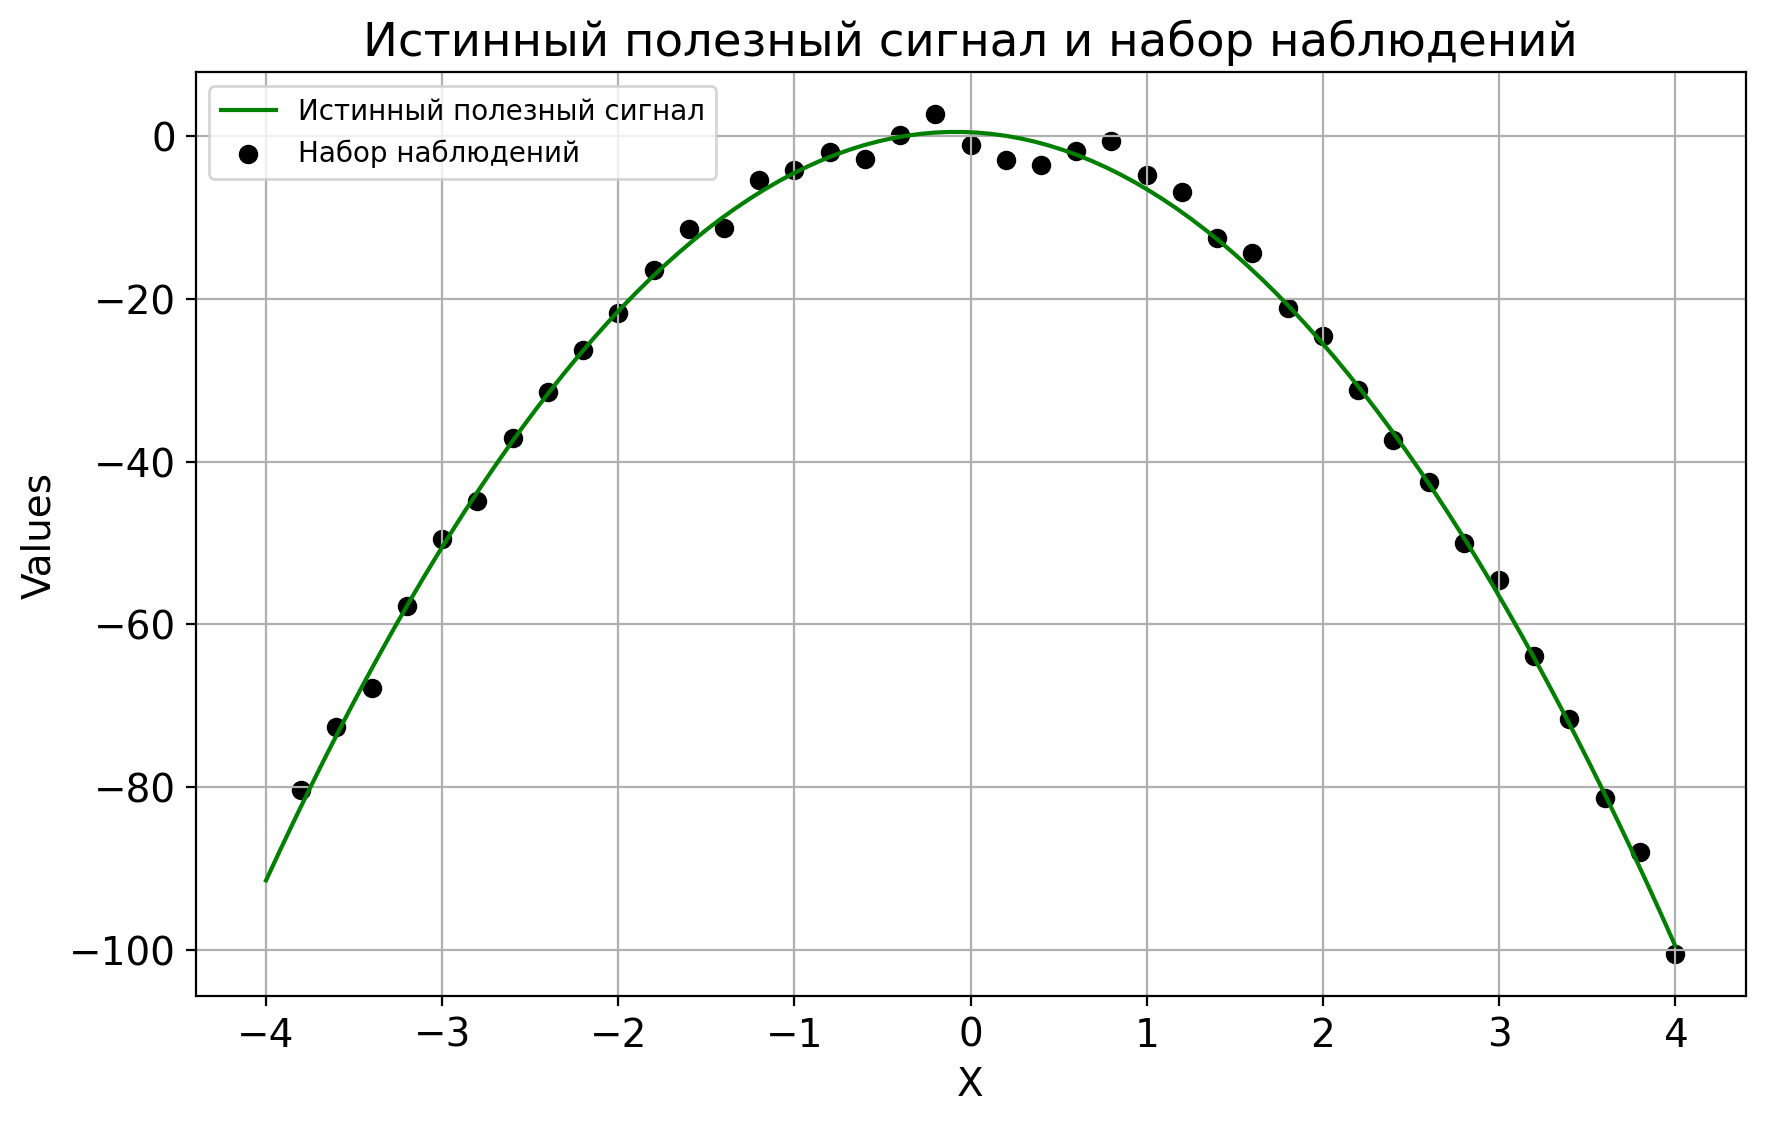

In [15]:
plot_phi(norm.x_k, norm.theta, norm.y, norm.m)

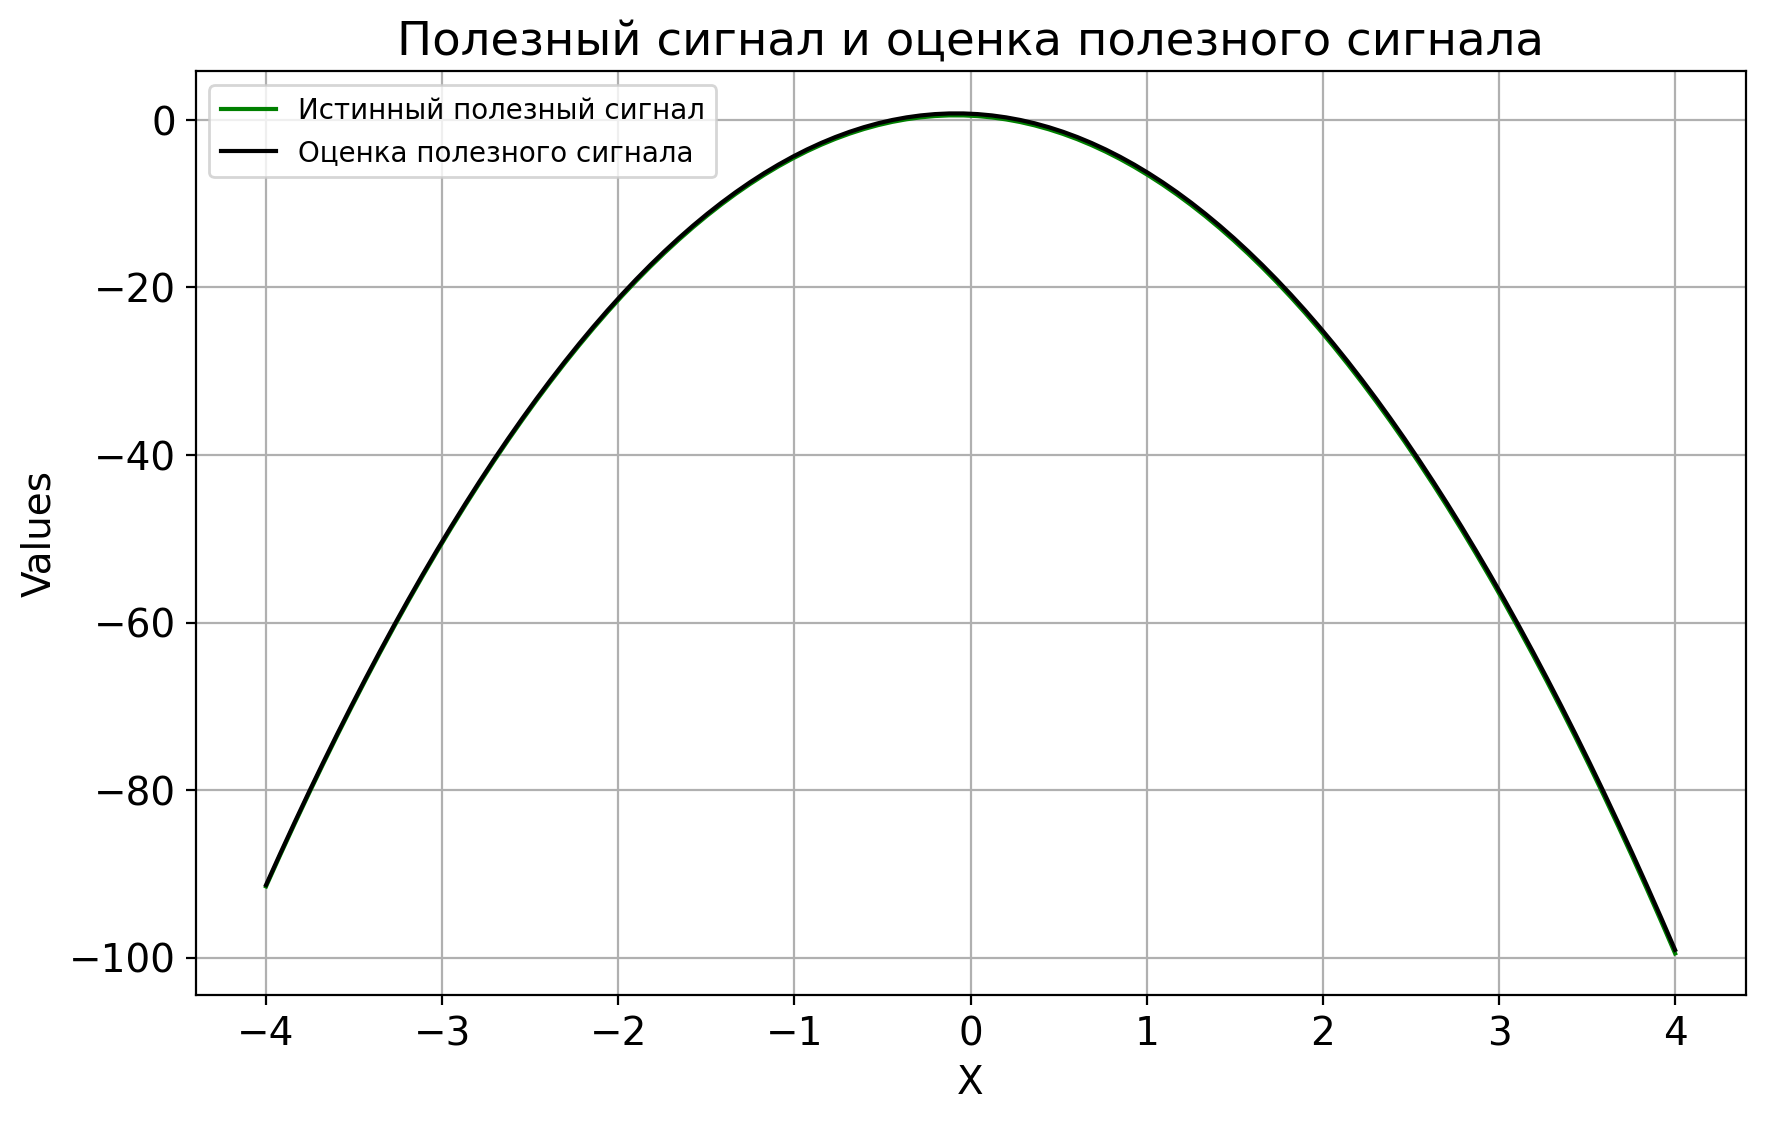

In [16]:
plot_phi_estimation(norm.theta, norm.w, norm.m)

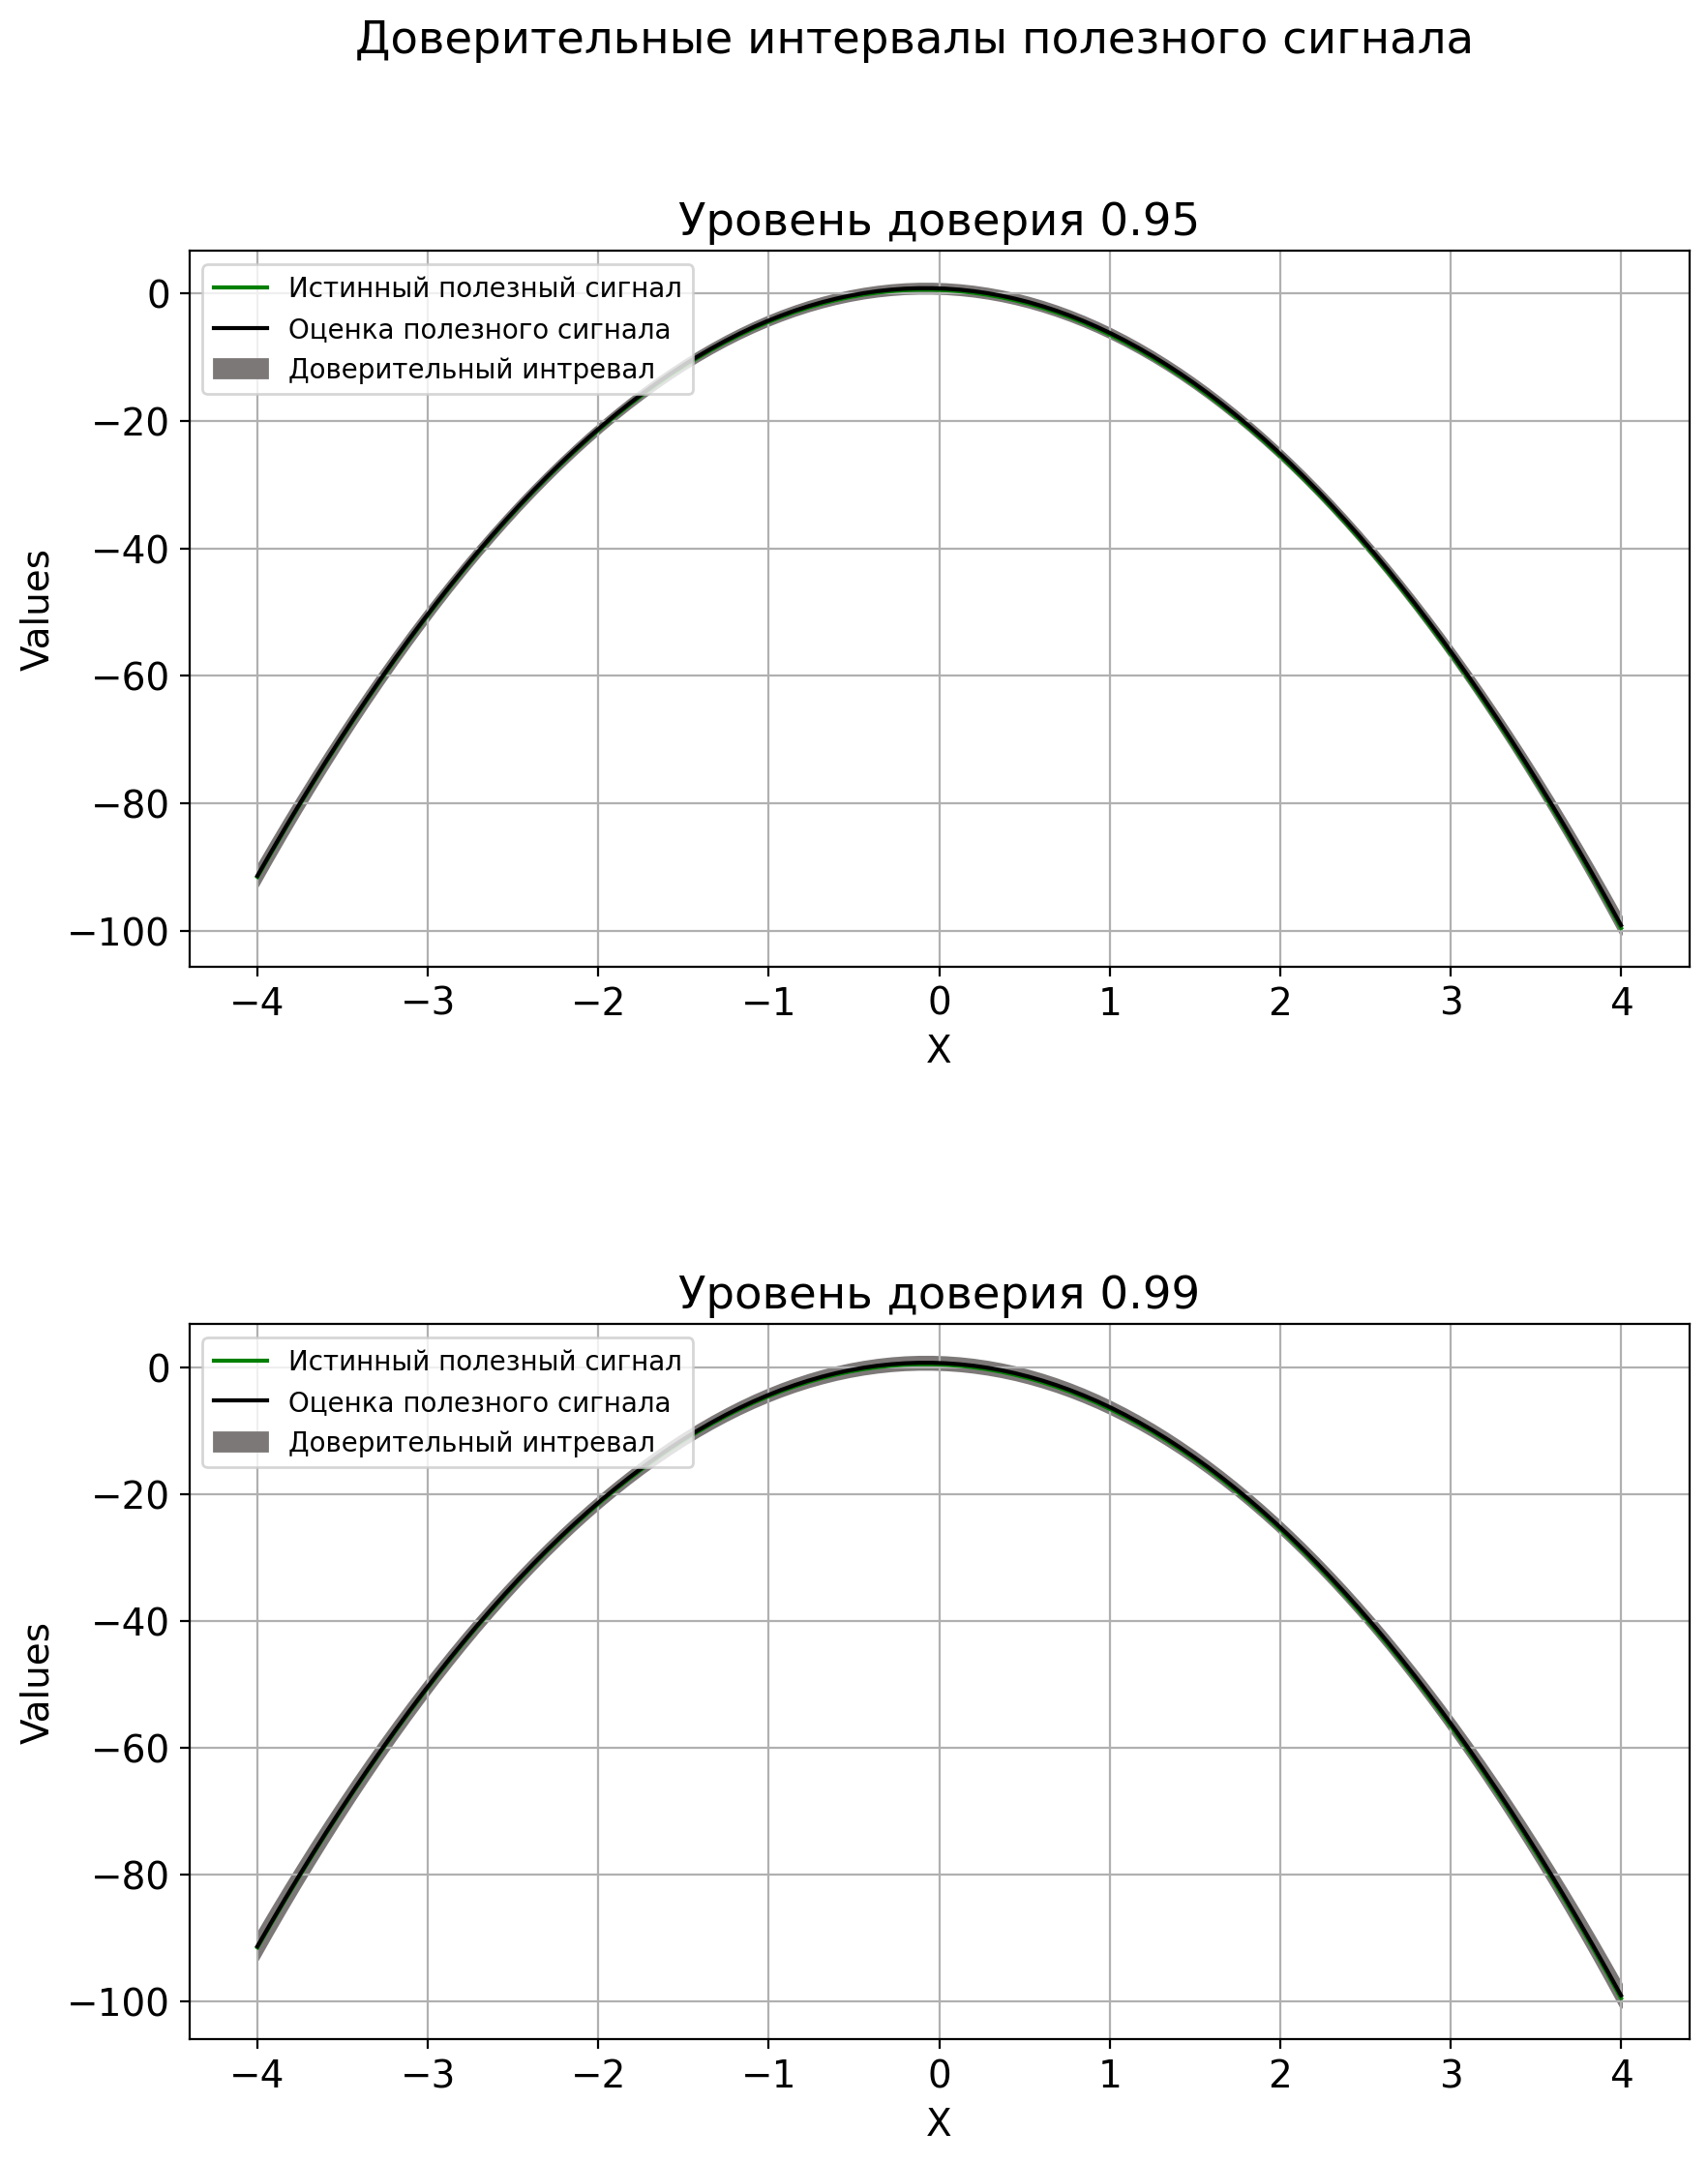

In [17]:
plot_phi_intervals(norm.theta, norm.w, norm.m, limits)

### <center> № 5 <center>
Для определения числа столбцов воспользуемся формулой:
$$N_{cols} = 1 + floor(3.322lg(N))$$
$$N = 40 \Rightarrow N_{cols} = 6$$

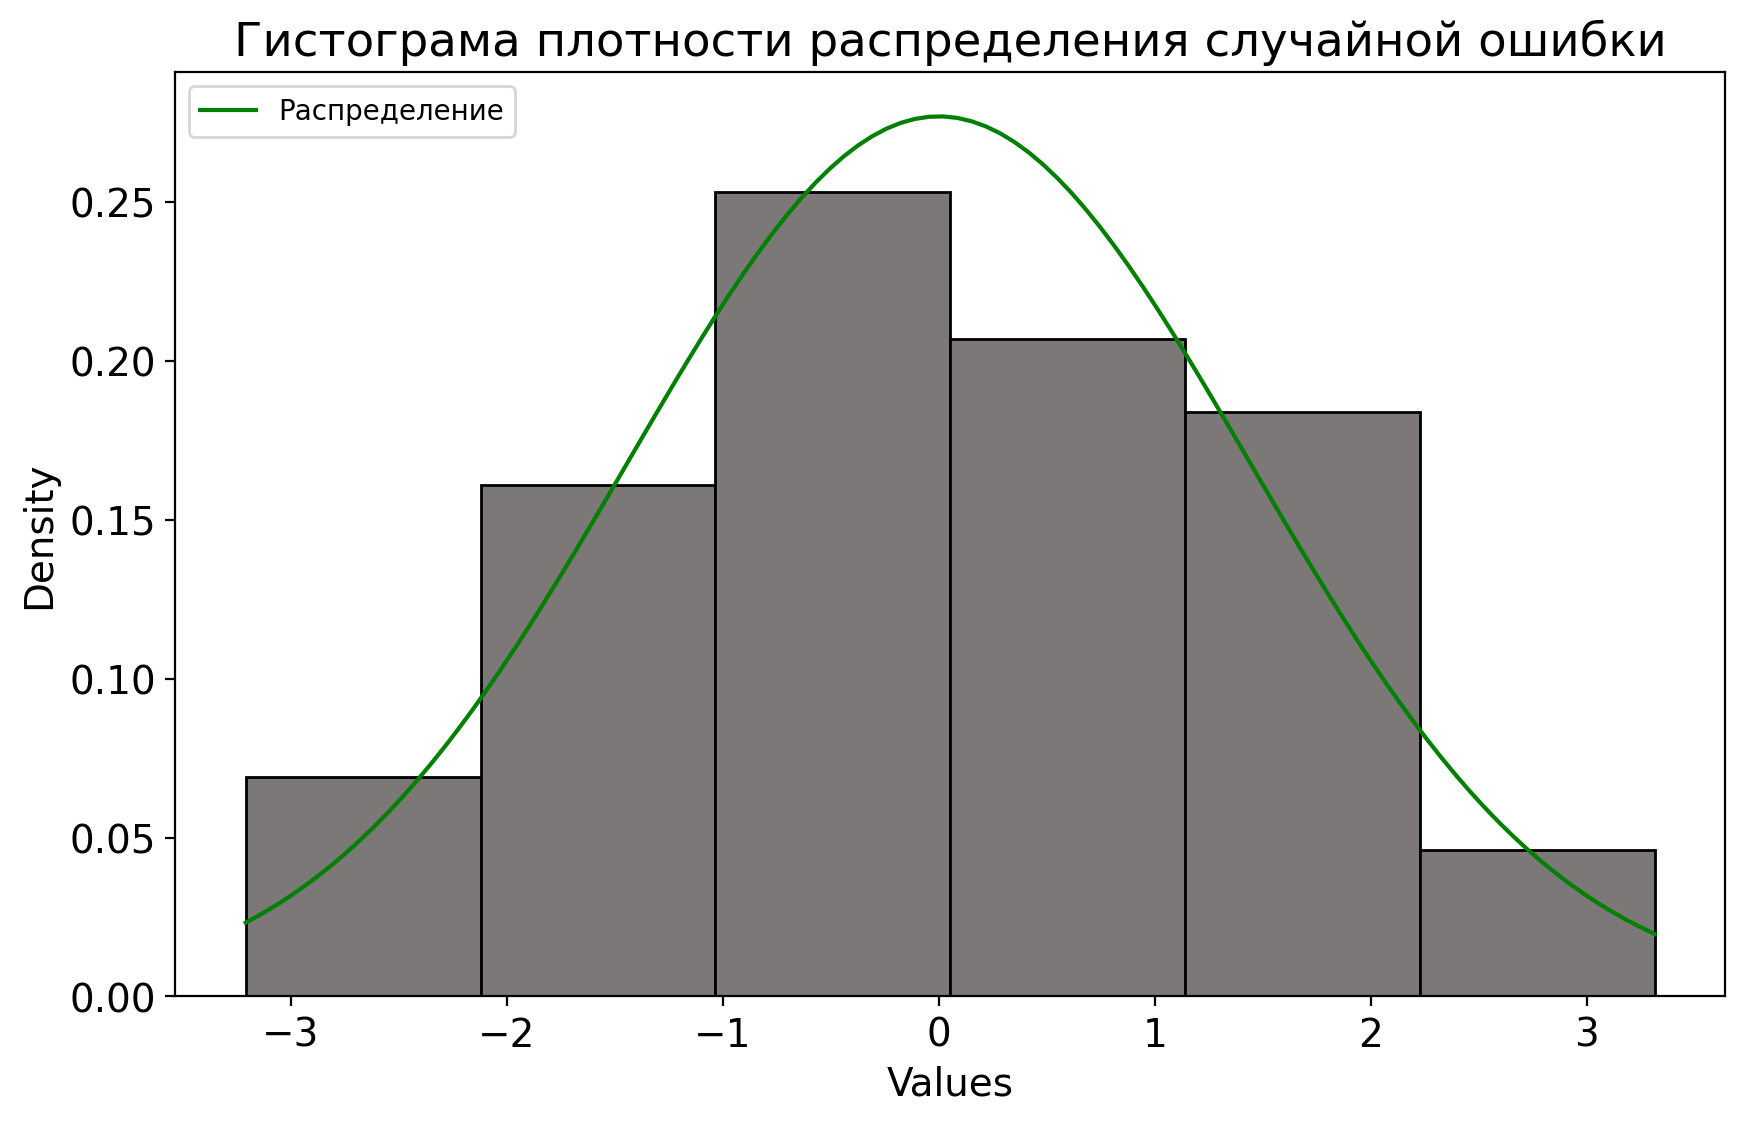

In [18]:
plot_hist(norm.y, norm.y_pred, norm.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n}$$

In [19]:
print(f"Случайная ошибка:")
print(norm.y - norm.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((norm.y - norm.y_pred)**2) / norm.n
print(estimate)

Случайная ошибка:
[ 1.82787082  0.9025878  -2.48954473 -0.18542561  0.75745667 -1.25666499
  0.21944945 -0.01856832 -0.17781906 -0.44931352  0.45867717  1.60995312
 -1.64623418  1.3394508   0.13536832  0.45522108 -1.92258903 -0.02047268
  1.99784331 -1.85474562 -3.20799873 -2.86312468  0.14408718  3.31518918
  1.41573941  2.23130829 -0.13702068  1.80283867 -0.70973117  0.60795188
 -0.72211729 -1.15468405 -0.14152903 -1.06496734  1.60150055 -0.07943582
  0.21732067 -0.9007733   1.4787612  -1.51581575]

Оценка дисперсии случайной ошибки:
2.0757933230098318


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Определим гипотезы:
\
$H_0: Ошибка \sim N(0, \sigma^2)$
\
$H_1: Ошибка \nsim N(0, \sigma^2)$
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [20]:
p_value, chi2, confidence_interval, critical_interval = chi2_test(norm.x_k, norm.y, norm.y_pred, norm.n, 0.05)
print(f"Статистика X^2: {chi2}")
print(f"Доверительный интервал: {confidence_interval}")
print(f"Критический интервал: {critical_interval}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 7.395226298773331
Доверительный интервал: (0, 12.591587243743977)
Критический интервал: (12.591587243743977, inf)
P_value: 0.28583726740241433
Не отклоняем гипотезу о нормальности распределения остатков.


#### <center>  Решим п. 1-7 для Равномерного распределения <center>

#### <center> Генерация данных <center>

In [21]:
theta = np.array([0.5, -1, -6, 2e-2])
var = 1.5
n = 40
m = 2
normal_distribution = False
seed = 24

uni = Distribution(theta, var, n, m, normal_distribution, seed)

### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05. 
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $. 
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$ 
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [22]:
estimate_m = 2
while t_test(uni.x_k, uni.y, estimate_m, 0.05):
    estimate_m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 является статистически значимым.
Степень многочлена = 4 не является статистически значимым.
Степень многочлена равна 3


In [23]:
uni = Distribution(theta, var, n, estimate_m - 1, normal_distribution, seed)

In [24]:
for i in range(len(uni.w)):
    print(f'theta_{i} = {uni.w[i]}')

theta_0 = 1.2414797495554208
theta_1 = -0.2929963566594789
theta_2 = -5.966713545279479
theta_3 = -0.04693828058369981


In [25]:
print("Шум")
print(uni.eps)

Шум
[ 3.38042300e+00  1.46610816e+00  3.67325942e+00 -2.05707683e+00
 -1.02102311e+00  1.76246414e+00  3.64818962e+00 -1.34956858e+00
 -2.67084097e+00 -8.52569325e-01 -1.31890852e+00 -9.81647076e-01
  1.54061806e+00  2.94043434e+00  2.50696255e-01 -1.85700399e+00
  1.26251524e+00  4.53614446e-01  3.12749944e-01  2.89123761e+00
  2.51890497e+00 -1.42551051e+00  9.63897073e-01  1.32447972e+00
  3.45692245e+00  2.89211611e+00  3.25115283e+00  1.04513957e+00
  8.42484609e-01 -2.00111123e+00 -1.02644381e-01  2.25759157e+00
  2.52949121e+00  2.54851278e-01  1.89442104e+00 -2.37439252e-03
  2.57437377e+00  8.79588070e-01  2.65731067e+00 -1.97161489e+00]


In [26]:
print("Признак x")
print(uni.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [27]:
print("Зависимая переменная y")
print(uni.y)

Зависимая переменная y
[ -80.057017    -73.12701184  -62.57282058  -60.45243683  -52.06102311
  -42.41657586  -34.16333038  -33.28604858  -29.22380097  -22.51256933
  -18.57554852  -14.32356708   -8.37426194   -4.03412566   -4.26930374
   -4.40724399    0.19819524    0.39233445    0.77258994    3.39123761
    2.57906497   -2.28423051   -1.29178293   -2.80528028   -3.02307755
   -6.41332389   -9.35396717  -15.33294043  -19.78087539  -27.34111123
  -30.62968438  -33.92592843  -39.77898879  -48.64610872  -54.06557896
  -63.48701439  -68.89954623  -79.04729193  -86.18524933 -100.19161489]


Сравним с готовой реализацией в пакете STATSMODELS

In [28]:
distr_packet = sm.OLS(uni.phi + uni.eps, sm.add_constant(uni.X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3378.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           3.72e-44
Time:                        10:34:25   Log-Likelihood:                -78.424
No. Observations:                  40   AIC:                             164.8
Df Residuals:                      36   BIC:                             171.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2415      0.431      2.883      0.0

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$ 
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- $t_{\alpha/2}$- Квантиль уровня ${\alpha / 2}$ распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [29]:
for a in (0.95, 0.99):
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(uni.w):
        l, r = calculate_confidence_interval_w(uni.se[i], w, uni.n, uni.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=1.2414797495554208:
		Доверительный интервал (0.36815013119885753, 2.114809367911984)
	Theta_1=-0.2929963566594789:
		Доверительный интервал (-0.9223476214246733, 0.33635490810571556)
	Theta_2=-5.966713545279479:
		Доверительный интервал (-6.090035743610695, -5.843391346948263)
	Theta_3=-0.04693828058369981:
		Доверительный интервал (-0.10724889524507797, 0.013372334077678343)

Уровень доверия 0.99:
	Theta_0=1.2414797495554208:
		Доверительный интервал (0.0704263007067698, 2.4125331984040717)
	Theta_1=-0.2929963566594789:
		Доверительный интервал (-1.1368976210268087, 0.5509049077078509)
	Theta_2=-5.966713545279479:
		Доверительный интервал (-6.132077094894495, -5.801349995664463)
	Theta_3=-0.04693828058369981:
		Доверительный интервал (-0.12780918180687728, 0.03393262063947765)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$- $t_{\alpha/2}$- Квантиль уровня ${\alpha / 2}$ распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [30]:
limits = {}

In [31]:
for alpha in (0.95, 0.99):
    print(f"Уровень доверия {alpha}:")
    interval, first_interval = calculate_confidence_interval_phi(norm.mse, norm.X, norm.w, norm.n, norm.m, alpha)
    l, r = interval
    l_first, r_first = first_interval
    limits[alpha] = (l[0], r[0])
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print(f'Значения в первой т. -3.8: {l_first, r_first}')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-5.99635112392264*x**2 - 0.968889703151534*x - 3.03530183536614*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.735038294713137
	-5.99635112392264*x**2 - 0.968889703151534*x + 3.03530183536614*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.735038294713137
	)
Значения в первой т. -3.8: (-83.5411570857713, -80.7998250397366)

Уровень доверия 0.99:
	Доверительный интервал:
	(
	-5.99635112392264*x**2 - 0.968889703151534*x - 4.06777007943663*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.

### <center> № 4 <center>

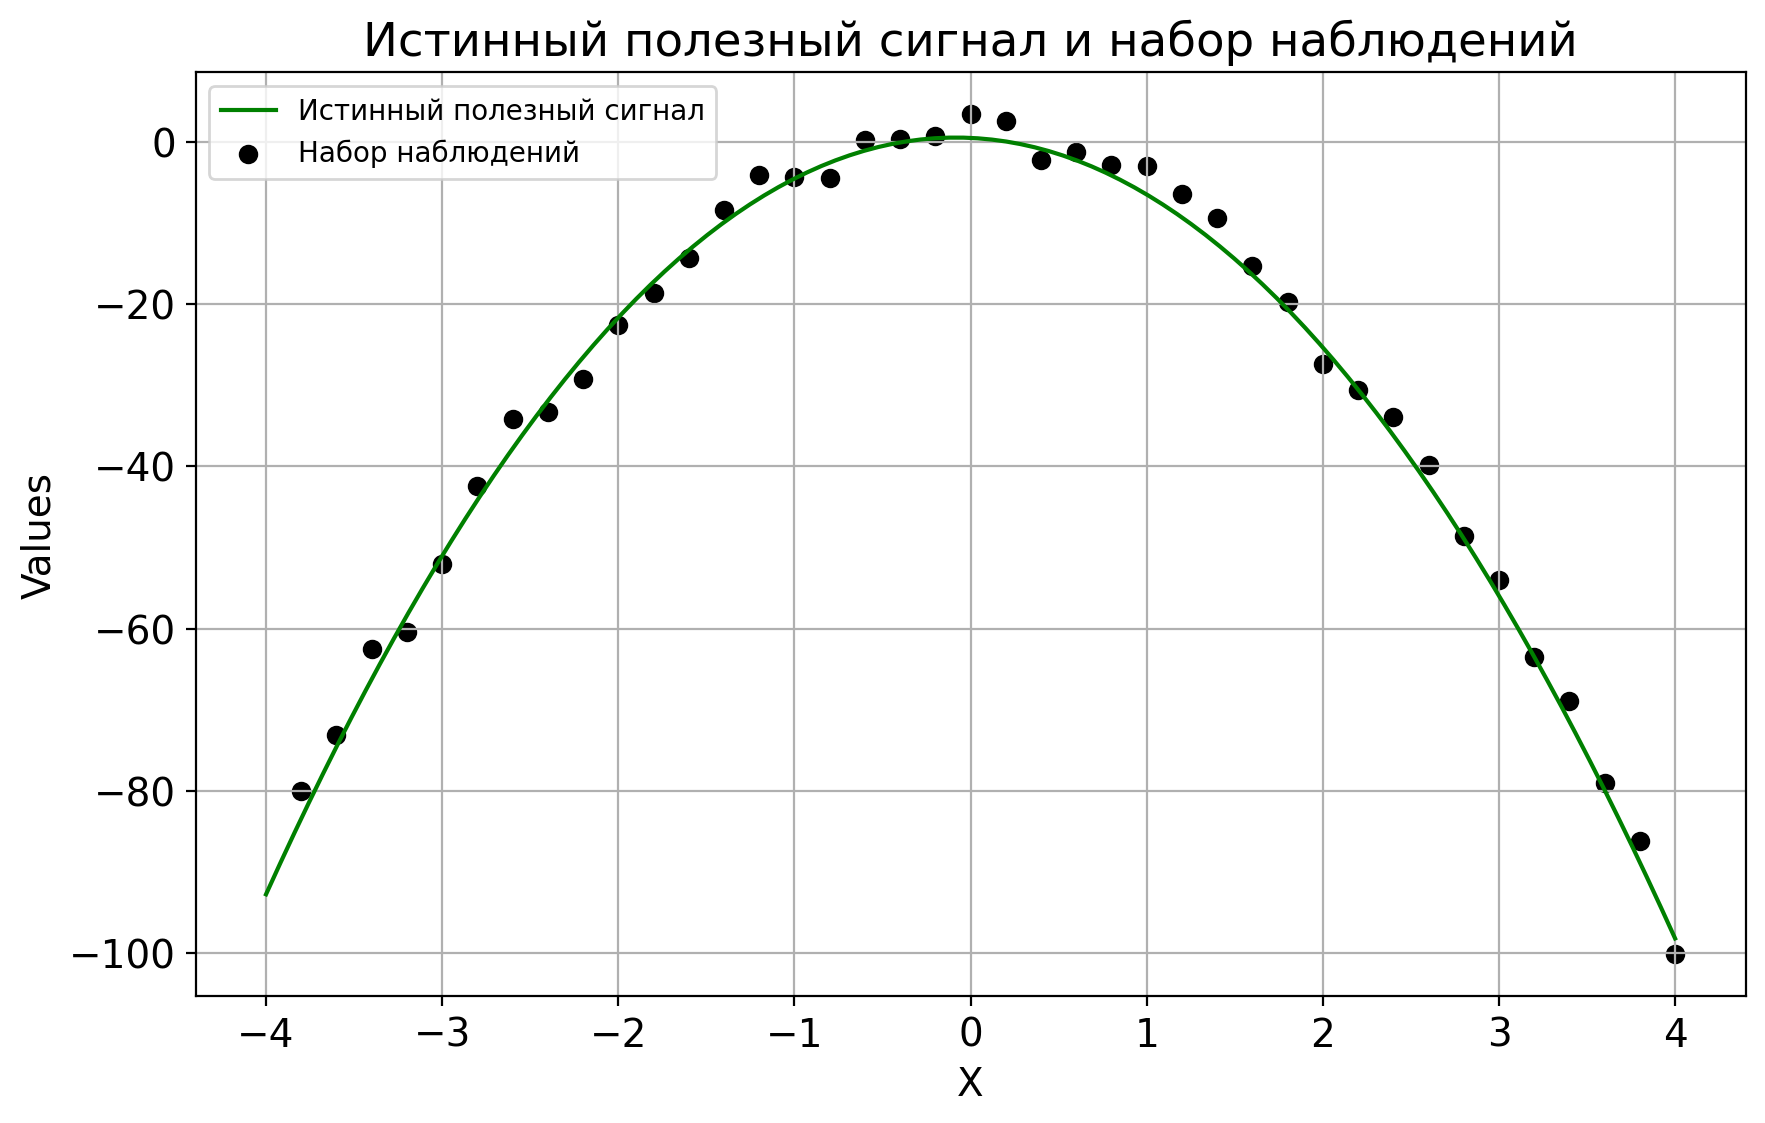

In [32]:
plot_phi(uni.x_k, uni.theta, uni.y, uni.m)

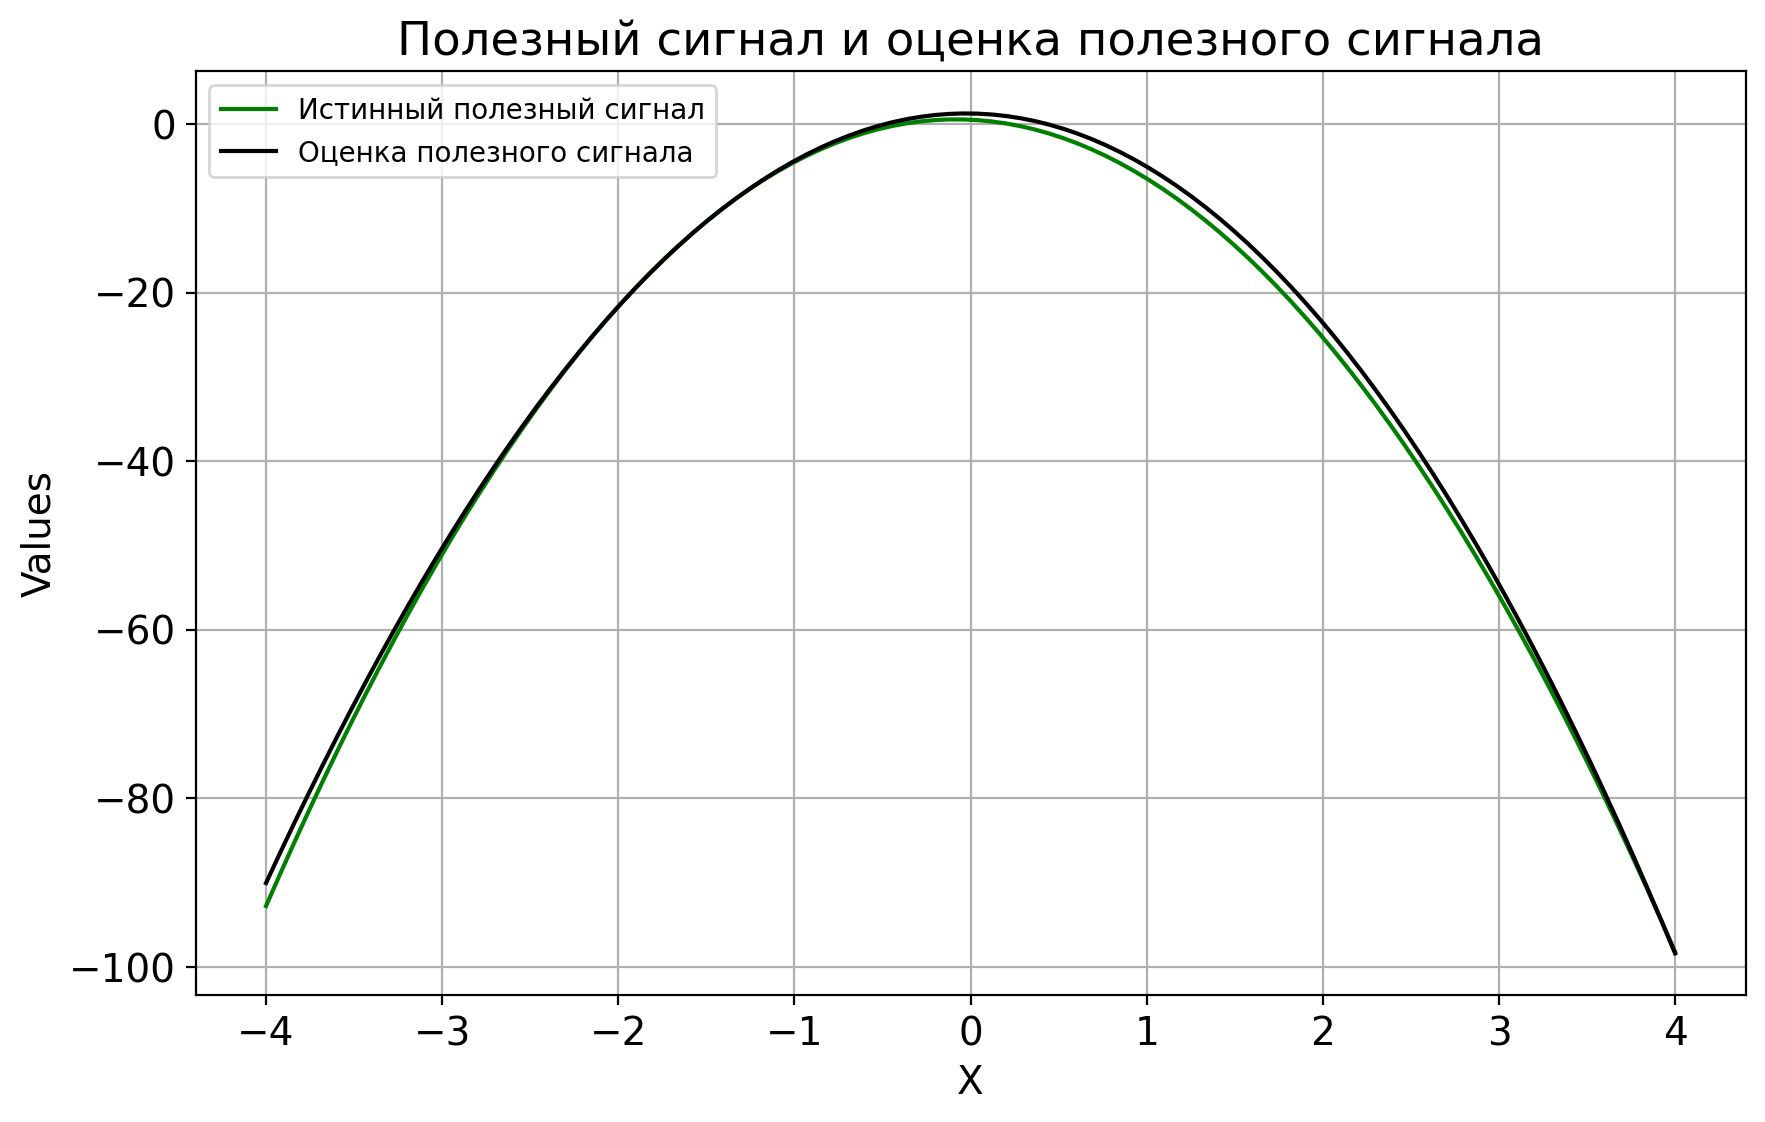

In [33]:
plot_phi_estimation(uni.theta, uni.w, uni.m)

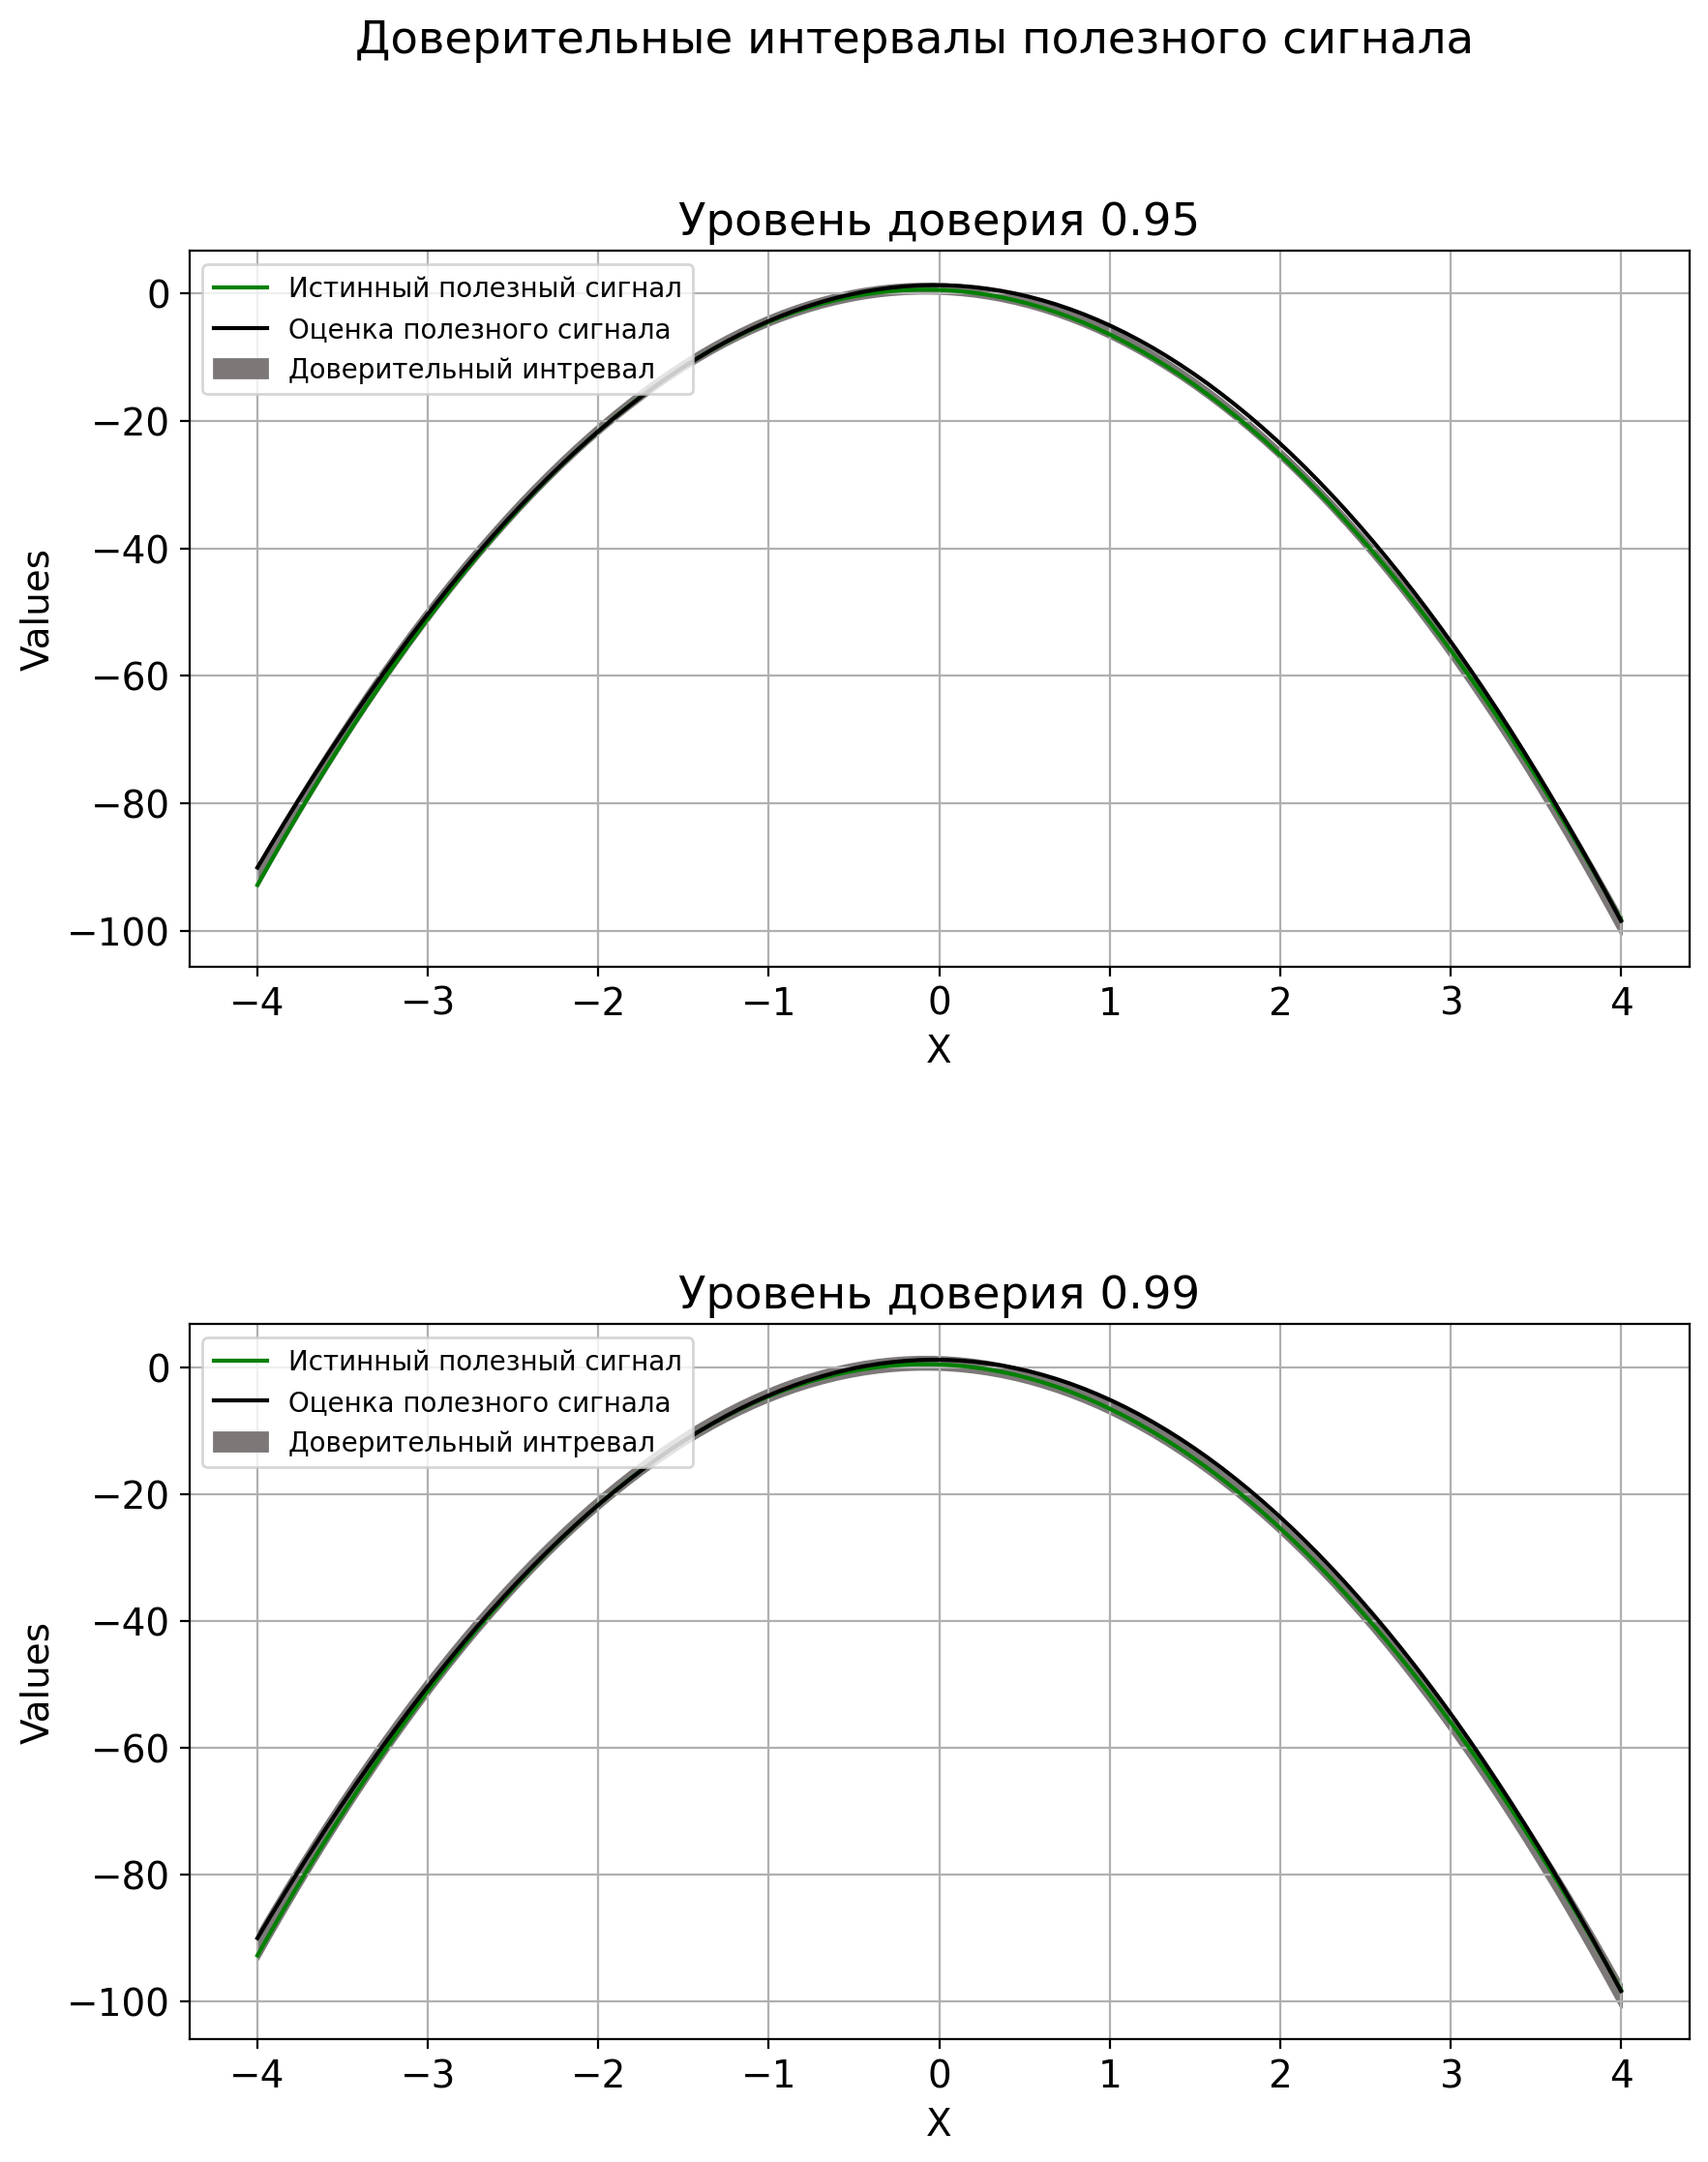

In [34]:
plot_phi_intervals(uni.theta, uni.w, uni.m, limits)

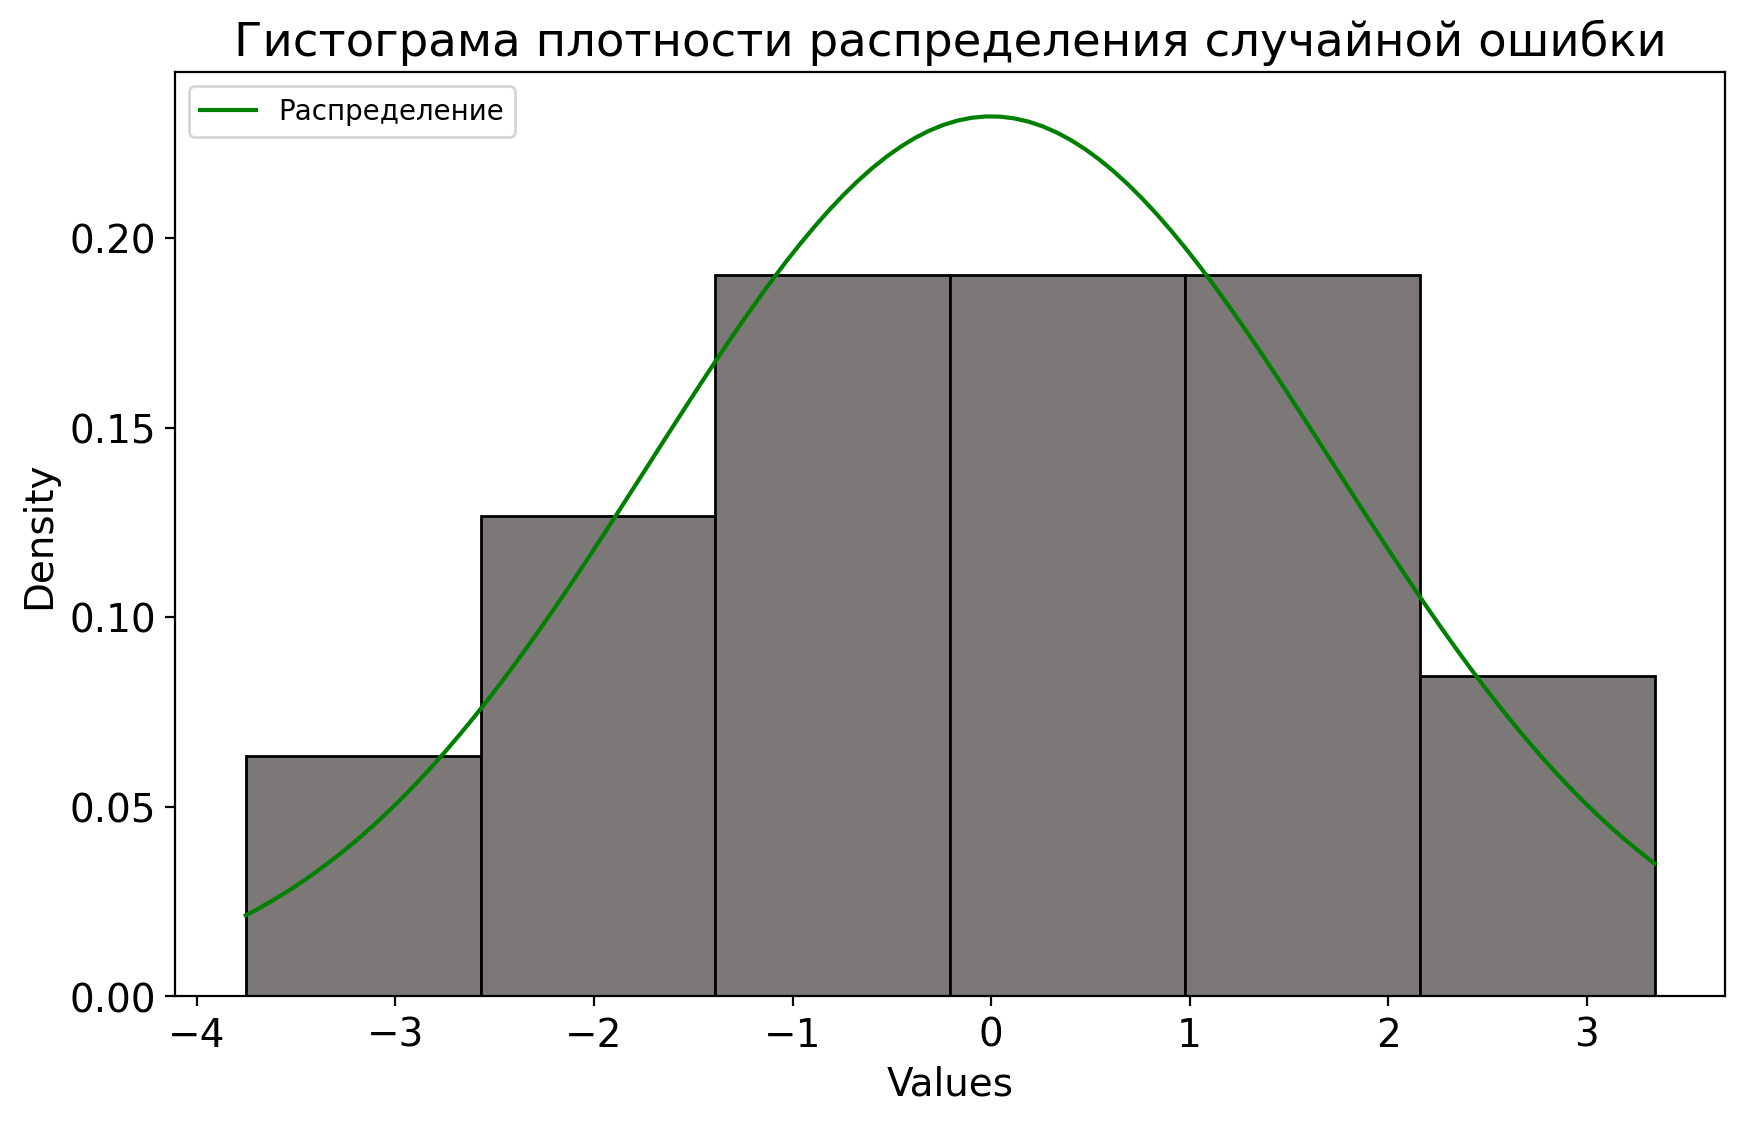

In [35]:
plot_hist(uni.y, uni.y_pred, uni.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n}$$

In [36]:
print(f"Случайная ошибка:")
print(uni.y - uni.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((uni.y - uni.y_pred)**2)  / uni.n
print(estimate)

Случайная ошибка:
[ 1.17186335 -0.28462335  2.31985846 -3.0704318  -1.7484036   1.27019965
  3.34339569 -1.51132436 -2.73077796 -0.84869385 -1.28601388 -0.95131352
  1.54002331  2.88375712  0.11599541 -2.08845656  0.91879588 -0.01467373
 -0.28919604  2.14975786  1.63522854 -2.4508335  -0.19930932  0.03036612
  2.04209088  1.36996884  1.63830517 -0.63858013 -0.88906576 -3.75423784
 -1.84787978  0.55292789  0.90129277 -1.25777534  0.53968584 -1.15368552
  1.67523239  0.28457517  2.421598   -1.78964254]

Оценка дисперсии случайной ошибки:
2.954522640054277


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Определим гипотезы:
\
$H_0: Ошибка \sim N(0, \sigma^2)$
\
$H_1: Ошибка \nsim N(0, \sigma^2)$
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [37]:
p_value, chi2, confidence_interval, critical_interval = chi2_test(uni.x_k, uni.y, uni.y_pred, uni.n, 0.05)
print(f"Статистика X^2: {chi2}")
print(f"Доверительный интервал: {confidence_interval}")
print(f"Критический интервал: {critical_interval}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 14.209173778337718
Доверительный интервал: (0, 12.591587243743977)
Критический интервал: (12.591587243743977, inf)
P_value: 0.027384883982905284
Отклоняем гипотезу о нормальности распределения остатков.


### <center> Литература <center>

[Matburo.ru](https://www.matburo.ru/tv_book.php): Для поиска информации.
\
\
[Statlect.com](https://www.statlect.com/): Для поиска информации.
\
\
[Huggingface.co](https://huggingface.co/chat/): Для поиска информации и разметки Markdown полей.
\
\
[Openai.com](https://chat.openai.com): Для поиска информации и разметки Markdown полей.
